In [1]:
import cv2
import numpy as np

### Grayscaling

In [2]:
image = cv2.imread('images/img1.png')
#cv2.imshow('original', image)
cv2.waitKey(0)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow('gray_scaled', gray_image)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [3]:
B, G, R = image[0, 0]
print(B, G, R)
print(image.shape)

122 158 196
(500, 500, 3)


In [4]:
print(gray_image.shape)
print(gray_image[0, 0])

(500, 500)
165


### Exploring HSV

In [5]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#cv2.imshow('HSV_image', hsv_image)

#cv2.imshow('HSV_hue_channel', hsv_image[:, :, 0])

#cv2.imshow('HSV_saturation_channel', hsv_image[:, :, 1])

#cv2.imshow('HSV_value_channel', hsv_image[:, :, 2])

cv2.waitKey(0)

cv2.destroyAllWindows()

### Individual channel in an RGB image

In [6]:
B, G, R = cv2.split(image)

print(B.shape)

#cv2.imshow('red', R)
#cv2.imshow('green', G)
#cv2.imshow('blue', B)
cv2.waitKey(0)
cv2.destroyAllWindows()

#remaking original image
merged = cv2.merge([B, G, R])
#cv2.imshow('Merged', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

#amplifying the blue color
merged_B = cv2.merge([B+80, G, R])
cv2.imshow('Merged_B>>', merged_B)
cv2.waitKey(0)
cv2.destroyAllWindows()

(500, 500)


In [7]:
#matrix of zeros

zeros = np.zeros(image.shape[:2], dtype = 'uint8')

cv2.imshow('red', cv2.merge([zeros, zeros, R]))
cv2.imshow('green', cv2.merge([zeros, G, zeros]))
cv2.imshow('blue', cv2.merge([B, zeros, zeros]))

cv2.waitKey(0)

cv2.destroyAllWindows()

In [8]:
image.shape[:2]

(500, 500)

### Histogram for visualizing individual color components

cv2.calcHist(images, channels, mask, histSize, ranges) 

In [9]:
from matplotlib import pyplot as plt

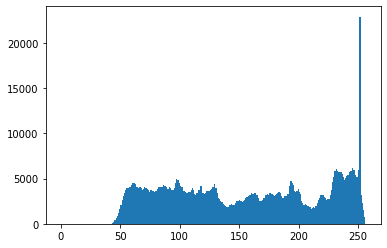

In [10]:
histogram = cv2.calcHist([image], [0], None, [256], [0,256])

# ravel() flattens our image array
plt.hist(image.ravel(), 256, [0,256])
plt.show()

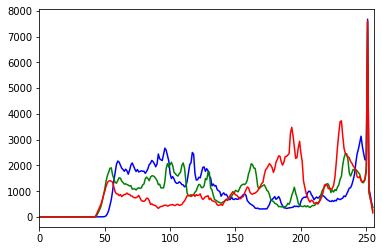

In [11]:
color = ('b', 'g', 'r')

for i,col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0,256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

### Creating a color/B&W image

In [12]:
image = np.zeros((512,512,3), np.uint8)
image_bw = np.zeros((512,512), np.uint8)
cv2.imshow('Color', image)
cv2.imshow('B&W', image_bw)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Drawing a line on an image

In [13]:
cv2.line(image, (0,0), (511,511), (255,145,0), 5)  #starting point, ending point, rgb colors, thickness in pixels
cv2.imshow('line', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Drawing a rectangle on an image

In [14]:
image = np.zeros((512,512,3), np.uint8)
cv2.rectangle(image, (100,100), (300,250), (255,145,0), 1)  #starting point, ending point, rgb colors, thickness in pixels
#cv2.imshow('rectangle', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

image = np.zeros((512,512,3), np.uint8)
cv2.rectangle(image, (100,100), (300,250), (255,145,0), -1)  #starting point, ending point, rgb colors, thickness in pixels
cv2.imshow('rectangle', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Drawing a circle on an image

In [15]:
image = np.zeros((512,512,3), np.uint8)
cv2.circle(image, (350,350), 100, (15,75,50), -1)     #center, radius
cv2.imshow('circle', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Drawing a polygon on an image

In [16]:
image = np.zeros((512,512,3), np.uint8)

pts = np.array([[10,50], [400,50], [90,200], [50,500]], np.int32)

pts = pts.reshape((-1,1,2))

cv2.polylines(image, [pts], True, (0,0,255), 3)

cv2.imshow('polygon', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Translation

Affline transform

cv2.warpAffine is used to implement this

In [17]:
image = cv2.imread('images/img1.png')

#storing image height and width

height, width = image.shape[:2]

quarter_height, quarter_width = height/4, width/4

# T is our translation matrix

# T = |1 0 Tx|
#     |0 1 Ty|

T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])

img_translation = cv2.warpAffine(image, T, (width, height))  #shifting the image by quarter of the dimensions
cv2.imshow("translation", img_translation)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Rotation

cv2.getRotationMatrix2D((rotation_center_x, rotation_center_y), angle of rotation, scale)

In [18]:
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)

rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

cv2.imshow('rotated_image', rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Scaling, Re-sizing and interpolation

In [19]:
image_scaled = cv2.resize(image, None, fx = 0.75, fy = 0.75)

#cv2.imshow('orig img', image)
#cv2.imshow('Scaling-linear interpolation', image_scaled)
cv2.waitKey(0)
cv2.destroyAllWindows()

img_scaled = cv2.resize(image, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
#cv2.imshow('Scaling-cubic interpolation', img_scaled)
cv2.waitKey(0)
cv2.destroyAllWindows()

img_scaled = cv2.resize(image, (300,300), interpolation = cv2.INTER_AREA)
cv2.imshow('Scaling-skewed size', img_scaled)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Image Pyramids

Pyramiding an image refers to either upscaling or downscaling it (by half), thus resizing very quickly

**Useful when scaling images during object detection** 

In [20]:
smaller = cv2.pyrDown(image)
larger = cv2.pyrUp(image)

cv2.imshow("orginal", image)
cv2.imshow('smaller', smaller)
cv2.imshow('larger', larger)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Cropping

In [21]:
start_row, start_column = int(height * .25), int(width * .25)

end_row, end_column = int(height * .75), int(width * .75)

cropped = image[start_row:end_row, start_column:end_column]

cv2.imshow('orginal', image)
cv2.imshow('cropped_image', cropped)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Arithmetic Operations

Add or subtract to the color intensity

Overall effect is inc. or dec. brightness

In [22]:
M = np.ones(image.shape, dtype = 'uint8') * 75

added = cv2.add(image, M)
cv2.imshow("added", added)

sub = cv2.subtract(image, M)
cv2.imshow('subtracted', sub)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
print(M)

[[[75 75 75]
  [75 75 75]
  [75 75 75]
  ...
  [75 75 75]
  [75 75 75]
  [75 75 75]]

 [[75 75 75]
  [75 75 75]
  [75 75 75]
  ...
  [75 75 75]
  [75 75 75]
  [75 75 75]]

 [[75 75 75]
  [75 75 75]
  [75 75 75]
  ...
  [75 75 75]
  [75 75 75]
  [75 75 75]]

 ...

 [[75 75 75]
  [75 75 75]
  [75 75 75]
  ...
  [75 75 75]
  [75 75 75]
  [75 75 75]]

 [[75 75 75]
  [75 75 75]
  [75 75 75]
  ...
  [75 75 75]
  [75 75 75]
  [75 75 75]]

 [[75 75 75]
  [75 75 75]
  [75 75 75]
  ...
  [75 75 75]
  [75 75 75]
  [75 75 75]]]


#### Bitwise-operation and masking

In [24]:
# making a square and an ellipse

square = np.zeros((300,300), np.uint8)
cv2.rectangle(square, (50,50), (250,250), 255, -2)
cv2.imshow('square', square)
cv2.waitKey(0)
cv2.destroyAllWindows()

ellipse = np.zeros((300,300), np.uint8)
cv2.ellipse(ellipse, (150,100), (150,100), 30, 0, 180, 255, -1)
cv2.imshow('ellipse', ellipse)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
AND = cv2.bitwise_and(square, ellipse)
cv2.imshow('and', AND)
cv2.waitKey(0)

OR = cv2.bitwise_or(square, ellipse)
cv2.imshow('or', OR)
cv2.waitKey(0)

XOR = cv2.bitwise_xor(square, ellipse)
cv2.imshow('xor', XOR)
cv2.waitKey(0)

NOT_square = cv2.bitwise_not(square)
cv2.imshow('not', NOT_square)
cv2.waitKey(0)

cv2.destroyAllWindows()

### Blurring

In [26]:
image = cv2.imread('images/LAnn.jpg')
#cv2.imshow('Lisa_Ann', image)
cv2.waitKey(0)


#using 3x3 kernel
kernel_3x3 = np.ones((3,3), np.float32)/9

blurred_3 = cv2.filter2D(image, -1, kernel_3x3)
#cv2.imshow('blurred_img', blurred_3)
cv2.waitKey(0)


#using 7x7 kernel
kernel_7x7 = np.ones((7,7), np.float32)/49

blurred_7 = cv2.filter2D(image, -1, kernel_7x7)
#cv2.imshow('blurred_img', blurred_7)
cv2.waitKey(0)


#using 10x10 kernel
kernel_10x10 = np.ones((10,10), np.float32)/100

blurred_10 = cv2.filter2D(image, -1, kernel_10x10)
cv2.imshow('blurred_img', blurred_10)
cv2.waitKey(0)


cv2.destroyAllWindows()

### Sharpening

It strengthens the edges in an image

In [27]:
image = cv2.imread('images/img1.png')

cv2.imshow('original', image)
cv2.waitKey(0)

#we don't need to normalize the matrix if the sum of the values is one. The brightness of the image won't be affected 
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])
sharpened = cv2.filter2D(image, -1, kernel_sharpening)

cv2.imshow('sharpened_image', sharpened)
cv2.waitKey(0)

cv2.destroyAllWindows()

### Thresholding, Binarization and Adaptive Thresholding

**Thresholding** is the act of converting an image to its binary form.

*cv2.threshold(image, threshold value, max value, threshold type)*

**Note**: Images need to be converted to grayscale before thresholding  


**Adaptive thresholding** methods take the uncertainty away.

*cv2.adaptiveThreshold(image, max value, adatptive type, threshold type, block size, constant that is subtracted from mean)*

**Note**: Block sizes need to be odd numbers

In [44]:
img = cv2.imread('images/grad.jpg')
#cv2.imshow('original', img)
cv2.waitKey(0)

image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2.imshow('gray_image', image)
cv2.waitKey(0)

#values below 127 goes to 0 and those above 127 goes to 255
ret, thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
#cv2.imshow('1 threshold binary', thresh1)
cv2.waitKey(0)

#just the inverse of the above
ret, thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
#cv2.imshow('2 threshold binary inverse', thresh2)
cv2.waitKey(0)

#values above 127 are held(truncated) at 127 and the value 255 is unused 
ret, thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
#cv2.imshow('3 threshold truncated', thresh3)
cv2.waitKey(0)

#values above 127 are unchanged at higher value and values below 127 go to 0
ret, thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
#cv2.imshow('4 threshold tozero', thresh4)
cv2.waitKey(0)

#reverse of above 
ret, thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
#cv2.imshow('5 threshold truncated inverse', thresh5)
cv2.waitKey(0)

cv2.destroyAllWindows()

**Note**: *ret* is a boolean. If *true* it gets called

In [50]:
image = cv2.imread('images/origin_of_species.jpg', 0)
#cv2.imshow('original', image)
cv2.waitKey(0)



#using threshold binary
#values below 127 goes to 0 and those above 127 goes to 255
ret, thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
#cv2.imshow('1 threshold binary', thresh1)
cv2.waitKey(0)

# it's good practice to blur images as it removes noise
image = cv2.GaussianBlur(image, (3,3), 0)


#using adaptive threshold
#ADAPTIVE_THRESH_MEAN_C -> based on mean of the neighborhood of pixels
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5)
#cv2.imshow("Adaptive Mean Thresholding", thresh)
cv2.waitKey(0)

#THRESH_OTSU -> clever algorithm assumes that there are two peaks in the gray scale histogram of the image and tries to find an
#               optimal value to separate these two peaks   
_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#cv2.imshow("Otsu's thresholding", th2)
cv2.waitKey(0)


#Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)

_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#cv2.imshow("Gaussian Otsu's thresholding", th3)
cv2.waitKey(0)


cv2.destroyAllWindows()

### Dilation, Erosion, Opening and Closing

Opening and closing are good for removing noise

In [60]:
image = cv2.imread('images/opencv.png')
#cv2.imshow('original', image)
cv2.waitKey(0)

kernel = np.ones((11,11), np.uint8)

erosion = cv2.erode(image, kernel, iterations = 1)
#cv2.imshow('erosion', erosion)
cv2.waitKey(0)

dilation = cv2.dilate(image, kernel, iterations = 1)
#cv2.imshow('dilation', dilation)
cv2.waitKey(0)

opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
#cv2.imshow('opening', opening)
cv2.waitKey(0)

closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
#cv2.imshow('closing', closing)
cv2.waitKey(0)


cv2.destroyAllWindows()

### Edge detection and Image gradients

Three methods are there:

* Sobel
* Laplacian
* Canny

For **Canny Edge Detection** method:

*cv2.Canny(image, threshold1, threshold2)*

Values below below threshold1 will be detected as 'non-edges' and values above threshold2 will be detected as 'edges'. Value
in between will be detected as edges and non-edges based on how their intensities are connected. 

In [71]:
image = cv2.imread('images/LAnn.jpg', 0)

cv2.imshow('original', image)
cv2.waitKey(0)

height, width = image.shape


# extract sobel edges
sobel_x = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = 1) 
sobel_y = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = 1)

cv2.imshow('sobel_x', sobel_x)
cv2.waitKey(0)
cv2.imshow('sobel_y', sobel_y)
cv2.waitKey(0)

sobel_or = cv2.bitwise_or(sobel_x, sobel_y)
cv2.imshow('sobel_or', sobel_or)
cv2.waitKey(0)


#laplacian method
laplacian = cv2.Laplacian(image, cv2.CV_64F)
cv2.imshow('laplacian', laplacian)
cv2.waitKey(0)


#Canny method
canny = cv2.Canny(image, 20, 150)
cv2.imshow('Canny', canny)
cv2.waitKey(0)


cv2.destroyAllWindows()

### Getting perspective transform

*cv2.warpPerspectiveTransform(image, perspective_transformation_matrix, final-size of the image(i.e., coordinates) )*

In [76]:
image = cv2.imread('images/page.jpg')
cv2.imshow('original', image)
cv2.waitKey(0)

#co-ordinates of the original image
points_A = np.float32([[0,0], [489,0],
                       [0,600], [489,600]])

#co-ordinates of the image after transformation
points_B = np.float32([[40,10], [420,100],
                       [0,550], [450,490]])

#form the perspective transformation matrix
M = cv2.getPerspectiveTransform(points_A, points_B)

warped = cv2.warpPerspective(image, M, (489,600))

cv2.imshow('perspective_transformed_image', warped)
cv2.waitKey(0)


cv2.destroyAllWindows()

### Affine transform

In affine transform, we use only three co-ordinates

In [79]:
cv2.imshow('original', image)
cv2.waitKey(0)


rows, cols, ch = image.shape

#co-ordinates of the original image
points_A = np.float32([[0,0], [489,0],
                       [0,600]])

#co-ordinates of the image after transformation
points_B = np.float32([[40,10], [420,100],
                       [0,550]])

M = cv2.getAffineTransform(points_A, points_B)

warped = cv2.warpAffine(image, M, (cols, rows))

cv2.imshow('affine_transformed_image', warped)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [77]:
image.shape

(600, 489, 3)